This notebook contains code used to create figures in the powerpoint presentation, 8810-ML4BA-meeting-01-ML-overview.pptx

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Linear Regression on Random Data

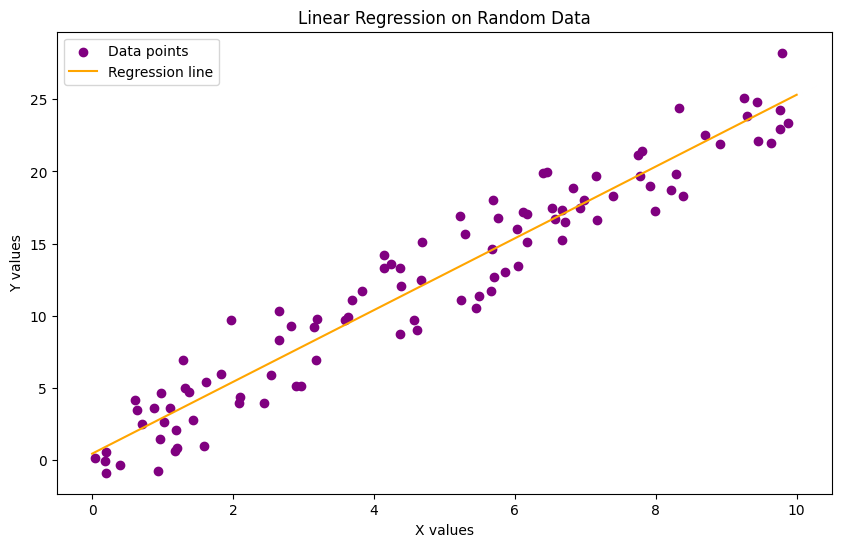

In [3]:
# Generating random data for regression
np.random.seed(0)
x = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 2.5 * x + np.random.randn(100, 1) * 2  # Linear relation with some noise

# Performing linear regression
model = LinearRegression()
model.fit(x, y)
x_fit = np.linspace(0, 10, 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

# Linear Regression on Random Data
# Changing the colors of the scatter plot and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points')  # Scatter plot in purple
plt.plot(x_fit, y_fit, color='orange', label='Regression line')  # Regression line in orange
plt.title('Linear Regression on Random Data')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

# Classification Example Using Logistic Regression

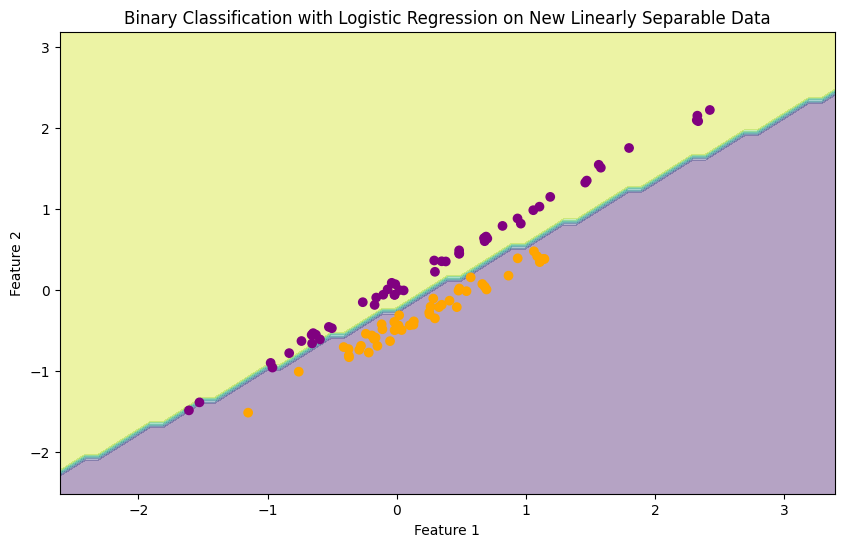

In [5]:
# Logistic regression demo
# Generating a new set of synthetic binary classification data that is linearly separable
X_new, y_new = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, flip_y=0, class_sep=0.25, random_state=42)

# Colors for the scatter plot: orange for negative class (0) and purple for positive class (1)
colors_new = ['orange' if label == 0 else 'purple' for label in y_new]

# Training a logistic regression classifier on the new linearly separable data
clf_new = LogisticRegression()
clf_new.fit(X_new, y_new)

# Creating meshgrid for decision boundary
x_min_new, x_max_new = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min_new, y_max_new = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx_new, yy_new = np.meshgrid(np.arange(x_min_new, x_max_new, 0.1),
                             np.arange(y_min_new, y_max_new, 0.1))

# Predicting values for decision boundary
Z_new = clf_new.predict(np.c_[xx_new.ravel(), yy_new.ravel()])
Z_new = Z_new.reshape(xx_new.shape)

# Plotting the new data sample
plt.figure(figsize=(10, 6))
plt.contourf(xx_new, yy_new, Z_new, alpha=0.4)
plt.scatter(X_new[:, 0], X_new[:, 1], c=colors_new, marker='o')
plt.title('Binary Classification with Logistic Regression on New Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Clustering Example Using K-Means

/home/masinoa/miniconda3/envs/cpce8810/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


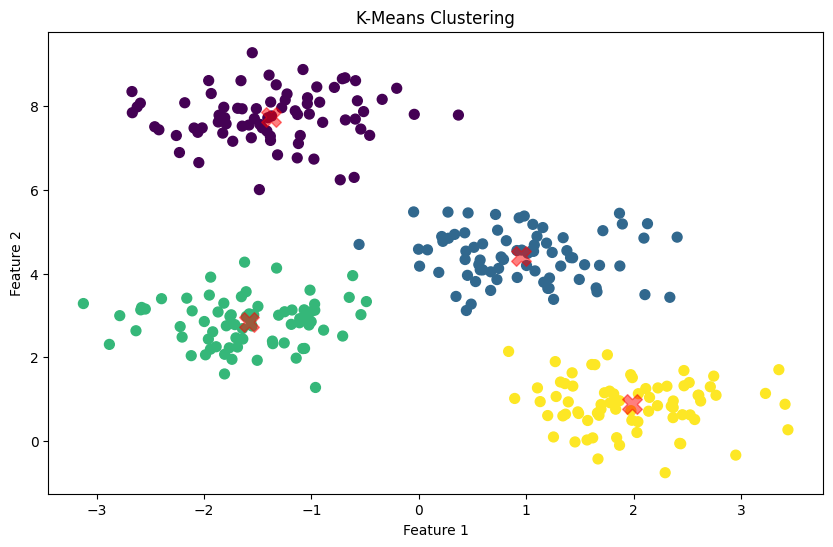

In [7]:
# Generating synthetic data for clustering
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Centroids marked with red 'X'
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

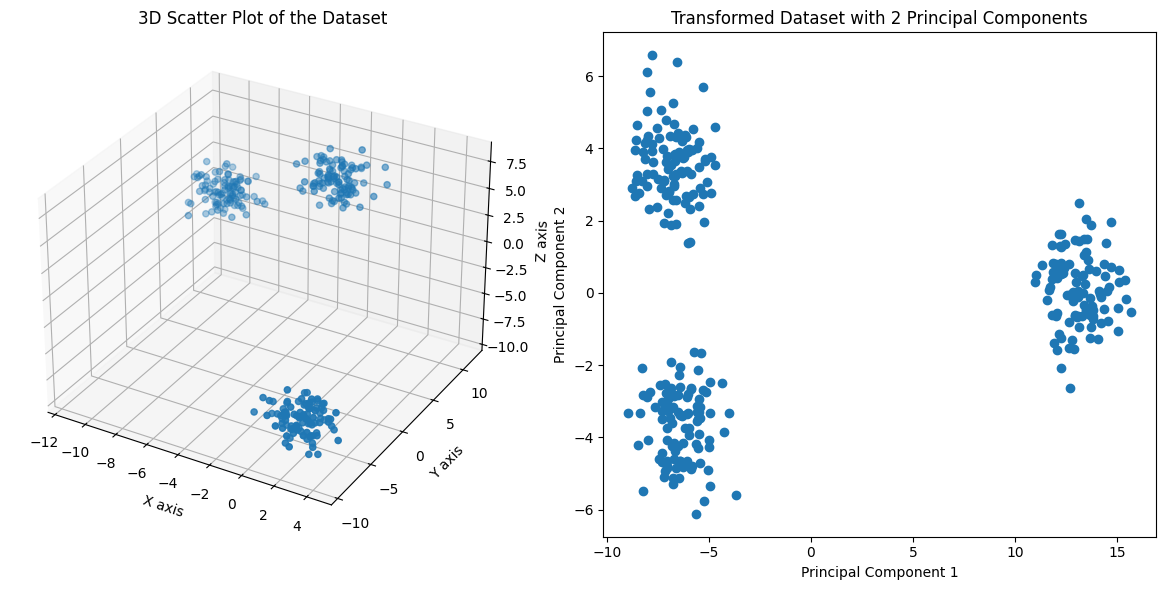

In [9]:
# 1. Creating a 3D dataset
X_3d, _ = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)

# 2. Plotting the dataset as a scatter plot in 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2])
ax.set_title("3D Scatter Plot of the Dataset")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# 3. Applying PCA to the dataset
pca = PCA(n_components=2)

# 4. Transforming the dataset using the first 2 principal components
X_pca = pca.fit_transform(X_3d)

# 5. Plotting the transformed dataset
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.set_title("Transformed Dataset with 2 Principal Components")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()